In [1]:
# Change working directory
os.chdir('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/')

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt
import seaborn as sns

python(19043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
def significance_marker(p):
    if 0 < p <= 0.001:
        return '***'
    elif 0.001 < p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''

In [3]:
def run_OLS_plots(X,y):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
    model = LinearRegression()
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    print('R squared:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))

    ### model
    results_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.params,
        'P-value': model.pvalues
    }).reset_index(drop=True)

    results_df['Significance'] = results_df['P-value'].apply(significance_marker)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=results_df, y='Feature', x='Coefficient', color='cornflowerblue')

    # Add significance markers as annotations
    for i, (coef, marker) in enumerate(zip(results_df['Coefficient'], results_df['Significance'])):
        ax.text(0, i, f' {marker}', color='black', va='center')

    # Customize plot
    # plt.xticks(rotation=45, horizontalalignment='right')
    plt.ylabel('Features')
    plt.xlabel('Estimated Coefficient')
    plt.show()
    print('P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1')
    return model
    

In [4]:
df_features = pd.read_excel('Reactant_features_alpha.xlsx')
unnecessary_columns = ['Reaction', 'Reactant', 'Product', 'Reagent', 'Catalyst',
       'Solvent (Reaction Details)', 'Time (Reaction Details) [h]',
       'Temperature (Reaction Details) [C]', 'Yield', 'Reaction ID',
       'Links to Reaxys', 'Reaction: Links to Reaxys', 'References',
        'Reactant SMILES', 'Product SMILES', 'Change_MW',
       'Largest Reactant MW', 'change in C-O single bond',
       'change in C=O double bond', 'Procedure', 'Reaction Map',
       'Reactant smiles map', 'Product smiles map', 'C_idx', 'O_idx', 'Sterimol parameters',
       'C_alpha_indexes','C_alpha_index 1', 'C_alpha_index 2',
       'Number sub group at index 1', 'Number sub group at index 2',
       'L_alpha1', 'Bmin_alpha1', 'Bmax_alpha1', 'L_alpha2', 'Bmin_alpha2',
       'Bmax_alpha2', 'PBV_alpha1', 'PBV_alpha2'
       ]
features_col_yield = df_features.drop(columns=unnecessary_columns)

# <span style="color:blue"> Fitting with splitted data </span>

R squared: 0.18734658092589684
MAE: 14.526457249081382


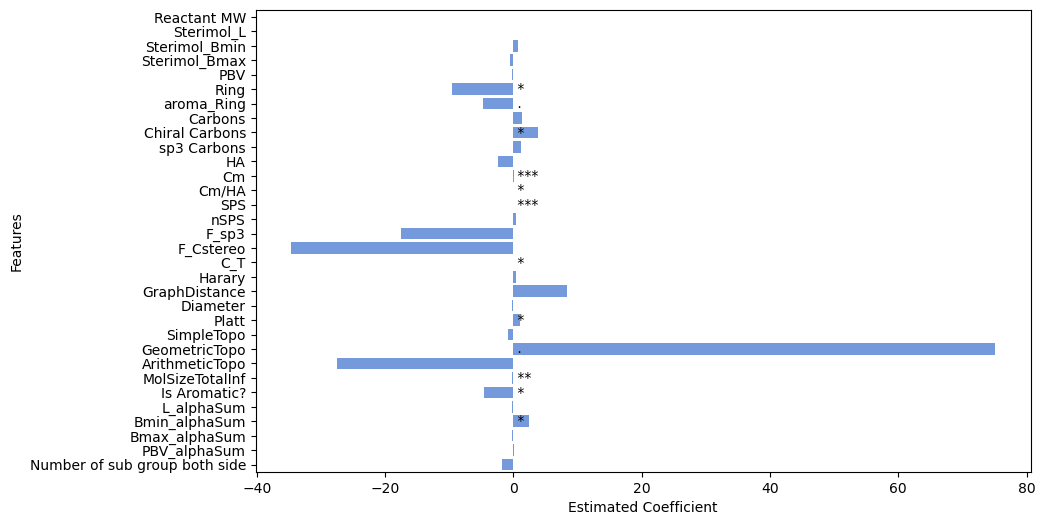

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              501.9
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                        0.00
Time:                        17:32:01   Log-Likelihood:                         -3059.4
No. Observations:                 724   AIC:                                      6183.
Df Residuals:                     692   BIC:                                      6329.
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Reactant MW                      -0.0179      0.033     -0.551      0.582      -0.082       0.046
Sterimol_L                       -0.0057      0.444     -0.013      0.990      -0.878       0.866
Sterimol_Bmin                     0.6625      1.439      0.460      0.645      -2.163       3.488
Sterimol_Bmax                    -0.5973      0.522     -1.144      0.253      -1.622       0.427
PBV                              -0.2377      0.244     -0.975      0.330      -0.717       0.241
Ring                             -9.5997      4.762     -2.016      0.044     -18.950      -0.249
aroma_Ring                       -4.7247      2.805     -1.684      0.093     -10.232       0.783
Carbons                           1.2494      3.077      0.406      0.685      -4.791       7.290
Chiral Carbons                    3.8954      1.771      2.199      0.028       0.418       7.373
sp3 Carbons                       1.2034      1.024      1.176      0.240      -0.806       3.213
HA                               -2.4457      2.942     -0.831      0.406      -8.221       3.330
Cm                                0.0785      0.022      3.567      0.000       0.035       0.122
Cm/HA                            -0.0960      0.048     -1.981      0.048      -0.191      -0.001
SPS                              -0.0615      0.016     -3.761      0.000      -0.094      -0.029
nSPS                              0.3881      0.357      1.086      0.278      -0.314       1.090
F_sp3                           -17.5119     11.518     -1.520      0.129     -40.126       5.103
F_Cstereo                       -34.7062     30.814     -1.126      0.260     -95.206      25.793
C_T                              -0.0360      0.016     -2.228      0.026      -0.068      -0.004
Harary                            0.3333      0.245      1.363      0.173      -0.147       0.813
GraphDistance                     8.2743     11.015      0.751      0.453     -13.353      29.902
Diameter                         -0.1898      0.700     -0.271      0.786      -1.564       1.185
Platt                             0.9760      0.420      2.323      0.020       0.151       1.801
SimpleTopo                       -0.9060      3.171     -0.286      0.775      -7.133       5.321
GeometricTopo                    75.1343     39.222      1.916      0.056      -1.873     152.142
ArithmeticTopo                  -27.5692     39.192     -0.703      0.482    -104.519      49.380
MolSizeTotalInf                  -0.2086      0.068     -3.045      0.002      -0.343      -0.074
Is Aromatic?                     -4.6229      2.048     -2.258      0.024      -8.643      -0.603
L_alphaSum                       -0.2545    

In [5]:
X = features_col_yield.drop(columns = 'Yield (number)')
y = features_col_yield['Yield (number)']
model_full = run_OLS_plots(X,y)
model_full.summary()

# <span style="color:blue"> Remove multicollinearity by taking those having VIF <10 </span>

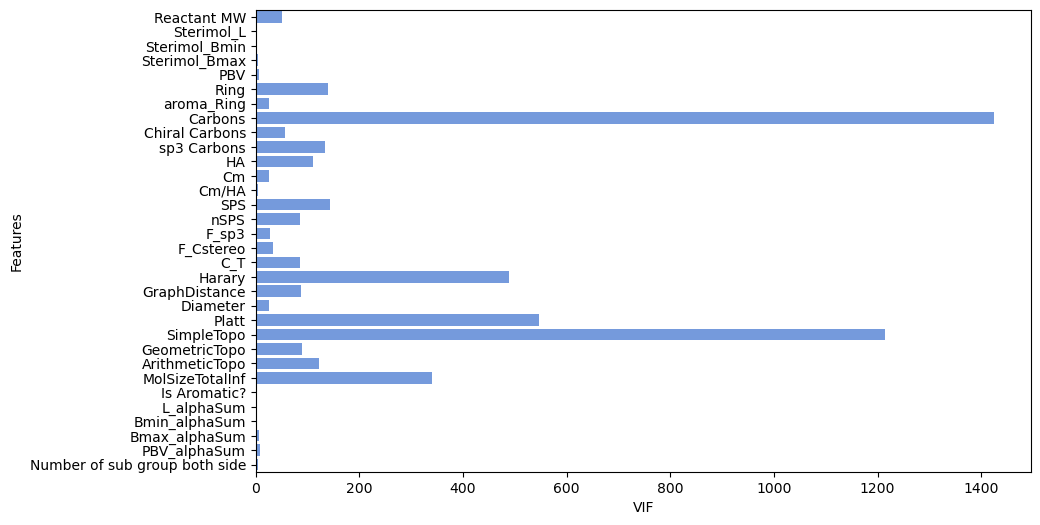

In [6]:
# Calculate VIF for each feature
X = features_col_yield.drop(columns='Yield (number)')
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data=vif_data[vif_data['Feature'] != 'const']
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vif_data, y='Feature', x='VIF', color='cornflowerblue')
# Customize plot
# plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Features')
plt.xlabel('VIF')
plt.show()

R squared: -0.02487509656114706
MAE: 15.516779060634057


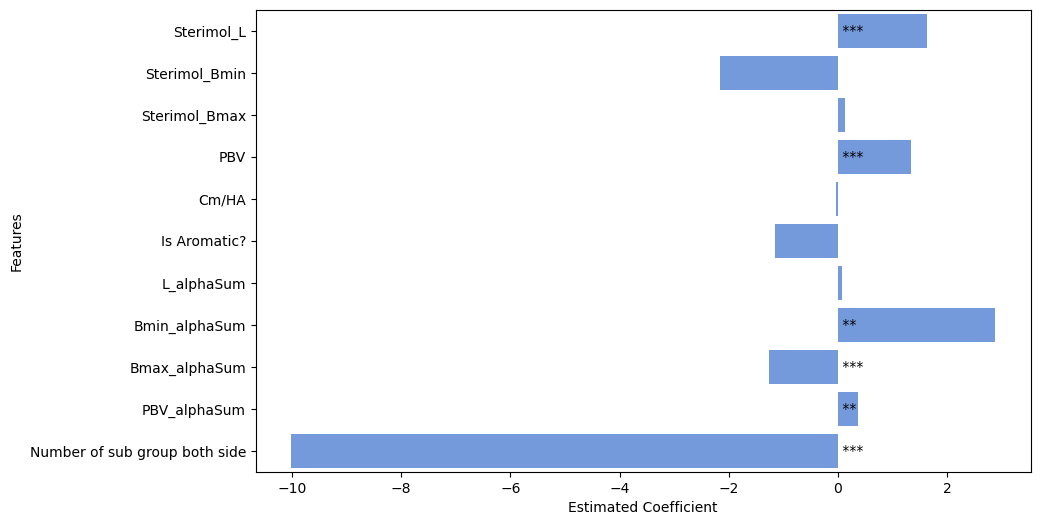

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              967.9
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                        0.00
Time:                        17:32:21   Log-Likelihood:                         -3203.7
No. Observations:                 724   AIC:                                      6429.
Df Residuals:                     713   BIC:                                      6480.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Sterimol_L                        1.6358      0.482      3.395      0.001       0.690       2.582
Sterimol_Bmin                    -2.1641      1.742     -1.242      0.215      -5.584       1.256
Sterimol_Bmax                     0.1244      0.532      0.234      0.815      -0.920       1.168
PBV                               1.3352      0.242      5.525      0.000       0.861       1.810
Cm/HA                            -0.0437      0.032     -1.352      0.177      -0.107       0.020
Is Aromatic?                     -1.1611      1.692     -0.686      0.493      -4.482       2.160
L_alphaSum                        0.0673      0.362      0.186      0.853      -0.644       0.779
Bmin_alphaSum                     2.8850      1.081      2.668      0.008       0.762       5.008
Bmax_alphaSum                    -1.2615      0.312     -4.040      0.000      -1.875      -0.648
PBV_alphaSum                      0.3757      0.126      2.979      0.003       0.128       0.623
Number of sub group both side   -10.0210      0.989    -10.137      0.000     -11.962      -8.080
==============================================================================
Omnibus:                      118.941   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.396
Skew:                          -1.052   Prob(JB):                     2.75e-42
Kurtosis:                       4.386   Cond. No.                         354.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
features_list = vif_data[vif_data["VIF"]<10]['Feature'].tolist()

X = X[features_list]
model_VIF = run_OLS_plots(X,y)
model_VIF.summary()

# <span style="color:blue"> Selection of features </span>

#### Forward selection

/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packa

R squared: 0.12290904515289292
MAE: 12.88960703202914


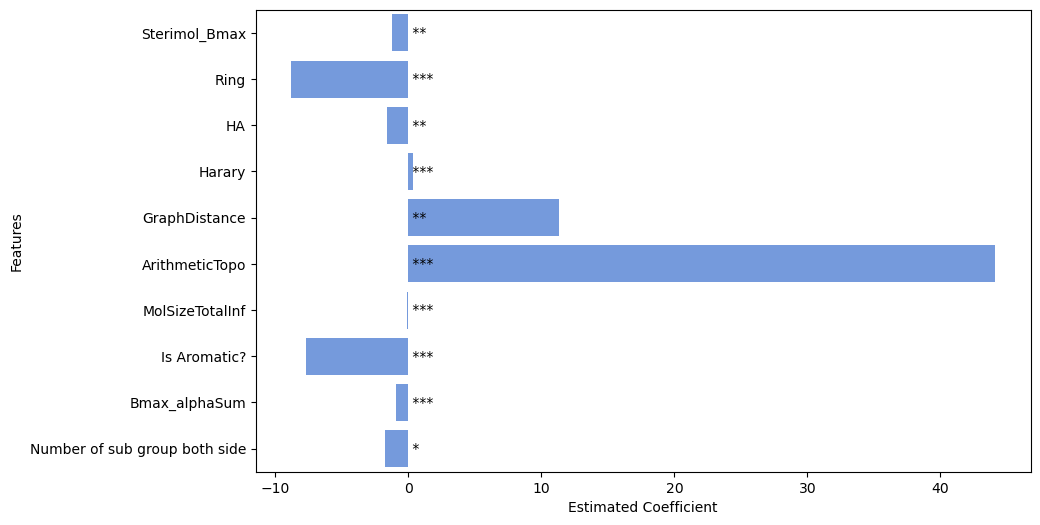

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1464.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                        0.00
Time:                        17:32:44   Log-Likelihood:                         -3096.3
No. Observations:                 724   AIC:                                      6213.
Df Residuals:                     714   BIC:                                      6258.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Sterimol_Bmax                    -1.2480      0.425     -2.939      0.003      -2.082      -0.414
Ring                             -8.8312      0.782    -11.287      0.000     -10.367      -7.295
HA                               -1.5983      0.496     -3.222      0.001      -2.572      -0.624
Harary                            0.3686      0.073      5.072      0.000       0.226       0.511
GraphDistance                    11.3128      3.462      3.268      0.001       4.517      18.109
ArithmeticTopo                   44.1297      4.601      9.592      0.000      35.097      53.162
MolSizeTotalInf                  -0.0892      0.021     -4.171      0.000      -0.131      -0.047
Is Aromatic?                     -7.6881      1.460     -5.266      0.000     -10.554      -4.822
Bmax_alphaSum                    -0.9159      0.246     -3.726      0.000      -1.398      -0.433
Number of sub group both side    -1.7749      0.715     -2.484      0.013      -3.178      -0.372
==============================================================================
Omnibus:                      127.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.591
Skew:                          -1.095   Prob(JB):                     6.86e-47
Kurtosis:                       4.500   Cond. No.                     3.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X = features_col_yield.drop(columns = 'Yield (number)')
y = features_col_yield['Yield (number)']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
model = LinearRegression()
forwad = SequentialFeatureSelector(
model,
k_features='best',
forward=True,
verbose=1,
scoring="neg_mean_absolute_error"
)
sf = forwad.fit(X,y)
feat_names = list(sf.k_feature_names_)

# Run model with selected features
X = X[feat_names]
model_forward = run_OLS_plots(X,y)
model_forward.summary()

#### Backward selection

/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/suongsuong/opt/anaconda3/lib/python3.9/site-packa

R squared: 0.15913513588759032
MAE: 14.998455919414525


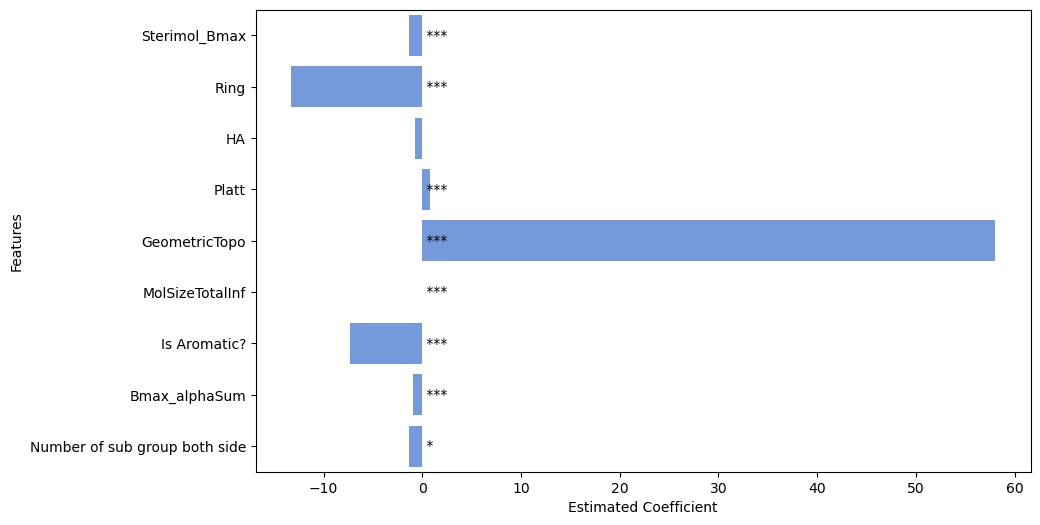

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1719.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                        0.00
Time:                        17:33:03   Log-Likelihood:                         -3083.5
No. Observations:                 724   AIC:                                      6185.
Df Residuals:                     715   BIC:                                      6226.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Sterimol_Bmax                    -1.3762      0.404     -3.408      0.001      -2.169      -0.583
Ring                            -13.3187      1.173    -11.358      0.000     -15.621     -11.016
HA                               -0.7313      0.470     -1.556      0.120      -1.654       0.192
Platt                             0.7666      0.137      5.604      0.000       0.498       1.035
GeometricTopo                    58.0606      2.055     28.247      0.000      54.025      62.096
MolSizeTotalInf                  -0.0597      0.018     -3.384      0.001      -0.094      -0.025
Is Aromatic?                     -7.3153      1.343     -5.447      0.000      -9.952      -4.679
Bmax_alphaSum                    -0.9564      0.224     -4.262      0.000      -1.397      -0.516
Number of sub group both side    -1.3982      0.680     -2.056      0.040      -2.734      -0.063
==============================================================================
Omnibus:                      159.592   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.367
Skew:                          -1.234   Prob(JB):                     6.05e-71
Kurtosis:                       5.150   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X = features_col_yield.drop(columns = 'Yield (number)')
y = features_col_yield['Yield (number)']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
model = LinearRegression()
forwad = SequentialFeatureSelector(
model,
k_features='best',
forward=False,
cv = 5,
scoring="neg_mean_absolute_error"
)
sf = forwad.fit(X,y)
feat_names = list(sf.k_feature_names_)

# Run model with selected features
X = X[feat_names]
model_backward = run_OLS_plots(X,y)
model_backward.summary()

# <span style="color:blue"> PCA </span>


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming data_features is already defined

# Separate the features and the target variable
X = data_features.drop(columns='Yield (number)')
y = data_features['Yield (number)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# # Create a DataFrame with the PCA results
# pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# # Add the target variable to the PCA DataFrame
# pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# # Plot the PCA results
# plt.figure(figsize=(10, 6))
# plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Yield (number)'], cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Yield (number)')
# plt.title('PCA of Features')
# plt.show()


In [13]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)

# Component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5'], index=X.columns)
print('Component loadings:')
loadings_df

Explained variance ratio: [0.51166022 0.18651227 0.10272392 0.04885243 0.0406685 ]
Component loadings:


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
Sterimol_L,0.574385,0.037036,0.059438,-0.231472,-0.173202
Sterimol_Bmin,0.508236,0.176399,-0.150174,0.523916,0.345982
Sterimol_Bmax,0.634695,-0.348904,-0.071499,-0.334431,0.028558
PBV,0.456033,0.187034,-0.021970,0.533668,0.538636
Ring,0.772464,0.126780,0.569778,0.047177,-0.094352
aroma_Ring,0.333176,-0.755266,0.481187,0.096576,0.070358
Carbons,0.931634,-0.242316,-0.059644,-0.148091,0.165585
Chiral Carbons,0.701160,0.616440,-0.087465,0.025869,-0.137795
sp3 Carbons,0.784747,0.383893,-0.367098,-0.231979,0.116697
HA,0.592196,-0.310323,-0.355013,0.378720,-0.473458


Mean Squared Error: 368.93506039133524
R^2 Score: 0.13541503958512546


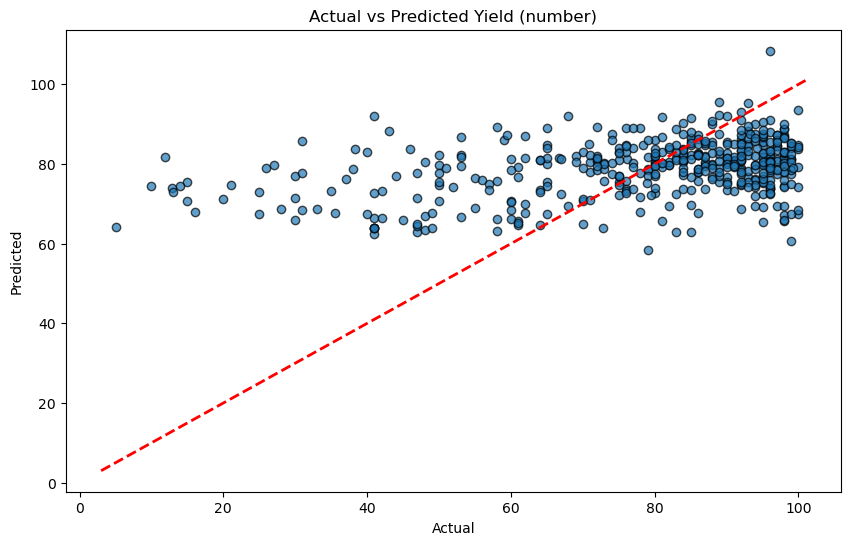

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming data_features is already defined

# Separate the features and the target variable
X = features_col_yield.drop(columns='Yield (number)')
y = features_col_yield['Yield (number)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=42)

# Train a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Yield (number)')
plt.show()